In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [43]:
bc=load_breast_cancer()
bc_data=pd.DataFrame(bc.data,columns=bc.feature_names)
bc_data.shape

(569, 30)

# for Logistic Regression

In [49]:
y=pd.Categorical.from_codes(bc.target,bc.target_names)
y.shape

(569,)

In [50]:
y=pd.get_dummies(y,drop_first=True)

In [51]:
y.shape

(569, 1)

In [58]:
x=bc_data
from sklearn.model_selection import train_test_split

In [62]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455, 1)
(114, 1)


In [63]:
from sklearn.linear_model import LogisticRegression

In [66]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\shash\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
from sklearn.metrics import confusion_matrix,classification_report
#checking training data
y_pred=model.predict(x_train)
conf_m=confusion_matrix(y_train,y_pred)
print(conf_m)
report=classification_report(y_train,y_pred)
print(report)

[[156  14]
 [  9 276]]
              precision    recall  f1-score   support

       False       0.95      0.92      0.93       170
        True       0.95      0.97      0.96       285

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455



In [74]:
y_test_pred=model.predict(x_test)
conf_m=confusion_matrix(y_test,y_test_pred)
print(conf_m)
report=classification_report(y_test,y_test_pred)
print(report)

[[38  4]
 [ 2 70]]
              precision    recall  f1-score   support

       False       0.95      0.90      0.93        42
        True       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



<Axes: >

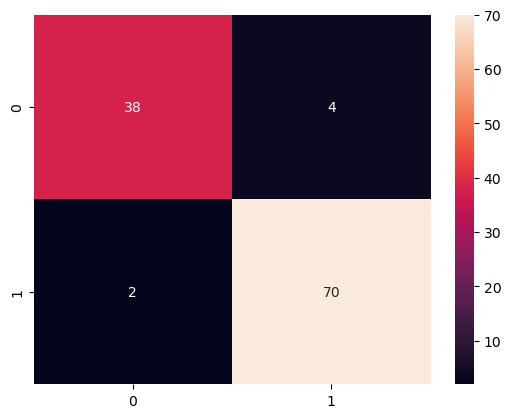

In [78]:
import seaborn as sns
sns.heatmap(conf_m,annot=True)


# for K-nearest neigbor algorithm

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
kn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
kn.fit(x_train,np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

In [98]:
#making standardisation because continue values are there
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train,y_train)
sc_xtrain=sc.transform(x_train)
sc.xtest=sc.transform(x_test)

In [104]:
y_train_pred=kn.predict(x_train.values)
con_m=confusion_matrix(y_train,y_train_pred)
print(con_m)
report=classification_report(y_train,y_train_pred)
print(report)

[[154  16]
 [  8 277]]
              precision    recall  f1-score   support

       False       0.95      0.91      0.93       170
        True       0.95      0.97      0.96       285

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455



C:\Users\shash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [105]:
y_test_pred=kn.predict(x_test.values)
con_m=confusion_matrix(y_test,y_test_pred)
print(con_m)
report=classification_report(y_test,y_test_pred)
print(report)

[[37  5]
 [ 2 70]]
              precision    recall  f1-score   support

       False       0.95      0.88      0.91        42
        True       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



C:\Users\shash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

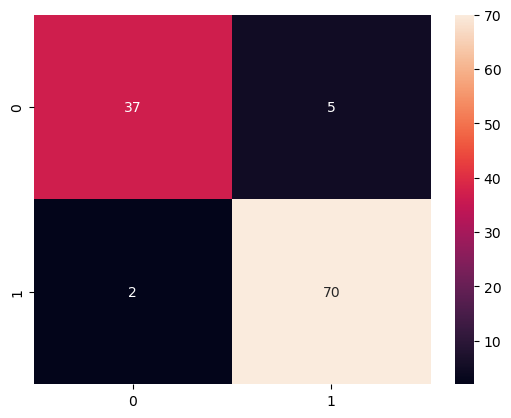

In [106]:
import seaborn as sns
sns.heatmap(con_m,annot=True)